In [1]:
import numpy as np
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib.pyplot import rc
rc('font',family='New Gulim')

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
rng=np.random.RandomState(42)
noise=rng.normal(size=(len(cancer.data), 50))
X_w_noise=np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

select=SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected=select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


In [6]:
noise.shape

(569, 50)

In [9]:
cancer.target.shape

(569,)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x20e9e4ecf98>],
 <a list of 1 Text yticklabel objects>)

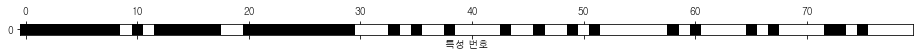

In [13]:
mask=select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])


In [14]:
from sklearn.linear_model import LogisticRegression

X_test_selected=select.transform(X_test)

lr=LogisticRegression()
lr.fit(X_train,y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test,y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.930
선택된 일부 특성을 사용한 점수: 0.940


In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select=SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),
                       threshold='median')

In [17]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x20ea05f0978>],
 <a list of 1 Text yticklabel objects>)

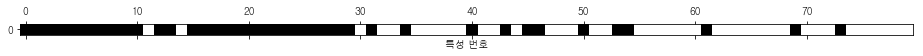

In [18]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [19]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


([<matplotlib.axis.YTick at 0x20ea25a59e8>],
 <a list of 1 Text yticklabel objects>)

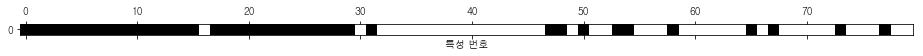

In [20]:
from sklearn.feature_selection import RFE
select=RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
mask= select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [21]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))


테스트 점수: 0.951


In [22]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


In [57]:
#4.6
citibike = pd.read_csv('C:\\Users\\la\\Anaconda3\\lib\\site-packages\\mglearn\\data\\citibike.csv')
citibike[:,2]

TypeError: unhashable type: 'slice'

In [46]:
citibike[:5]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,3117,8/1/2015 01:19:15,8/1/2015 02:11:12,301,E 2 St & Avenue B,40.722174,-73.983688,301,E 2 St & Avenue B,40.722174,-73.983688,18070,Subscriber,1986.0,1
1,690,8/1/2015 01:27:30,8/1/2015 01:39:00,301,E 2 St & Avenue B,40.722174,-73.983688,349,Rivington St & Ridge St,40.718502,-73.983299,19699,Subscriber,1985.0,1
2,727,8/1/2015 01:38:49,8/1/2015 01:50:57,301,E 2 St & Avenue B,40.722174,-73.983688,2010,Grand St & Greene St,40.721655,-74.002347,20953,Subscriber,1982.0,1
3,698,8/1/2015 06:06:41,8/1/2015 06:18:20,301,E 2 St & Avenue B,40.722174,-73.983688,527,E 33 St & 2 Ave,40.744023,-73.976056,23566,Subscriber,1976.0,1
4,351,8/1/2015 06:24:29,8/1/2015 06:30:21,301,E 2 St & Avenue B,40.722174,-73.983688,250,Lafayette St & Jersey St,40.724561,-73.995653,17545,Subscriber,1959.0,1


Text(0,0.5,'대여횟수')

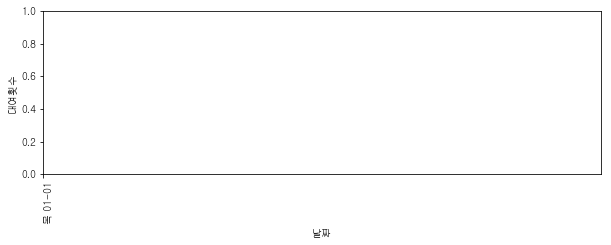

In [52]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks.astype(int), xticks_name, rotation=90, ha="left")
#plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")